In [1]:
import torch

In [2]:
special_model = torch.load("special_token_best.pt", map_location=torch.device('cpu'))
data_model = torch.load("best.pt", map_location=torch.device('cpu'))
DOMAINS = ["news", "politics", "science", "music", "literature", "ai"]

In [ ]:
domain_ids = model._emb._tok.convert_tokens_to_ids([f'[{domain.upper()}]' for domain in DOMAINS])

In [ ]:
domain_embs = model._emb._lm.embeddings.word_embeddings(torch.tensor(domain_ids)).detach().numpy()

In [ ]:
data_embs = model._emb.dataset_embeddings(torch.tensor([0,1,2,3,4,5])).detach().numpy()

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
s_pca = PCA(n_components=2, random_state=42)
d_pca = PCA(n_components=2, random_state=42)

In [ ]:
special_pca = s_pca.fit_transform(domain_embs)
data_pca = d_pca.fit_transform(data_embs)

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(x=special_pca[:,0], y=special_pca[:,1], hue=DOMAINS, s=100)
plt.savefig("pca_of_special_embeddings_slay.pdf", bbox_inches="tight")

In [ ]:
d_pca_3d = PCA(n_components=3, random_state=42)
s_pca_3d = PCA(n_components=3, random_state=42)
data_3d = d_pca_3d.fit_transform(data_embs)
special_3d = s_pca_3d.fit_transform(domain_embs)

In [ ]:
plt.figure(figsize = (10, 8))
ax = plt.axes(projection = '3d')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
for row, domain, color in zip(pca_3d_fit, DOMAINS, colors[:6]):
    ax.scatter(*row, c=color, label=domain, s=100)
ax.legend()
ax.view_init(elev=30, azim=45, roll=0)
plt.show()

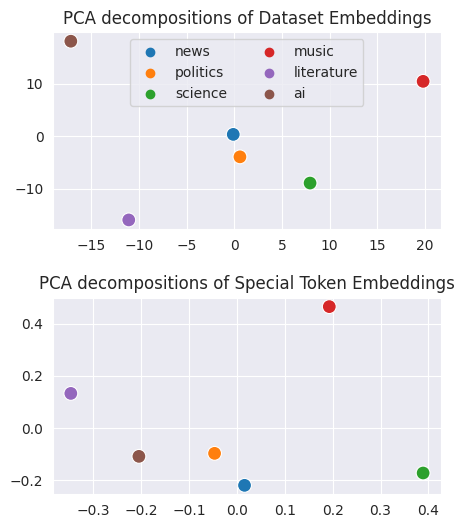

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.decomposition import PCA

DOMAINS = ["news", "politics", "science", "music", "literature", "ai"]

dataset_embeddings_model = torch.load("dataset_embeddings_best.pt", map_location=torch.device("cpu"))
data_embs = (
    dataset_embeddings_model._emb.dataset_embeddings(torch.tensor([0, 1, 2, 3, 4, 5])).detach().numpy()
)

special_token_model = torch.load("special_token_best.pt", map_location=torch.device("cpu"))

domain_ids = special_token_model._emb._tok.convert_tokens_to_ids(
    [f"[{domain.upper()}]" for domain in DOMAINS]
)
domain_embs = (
    special_token_model._emb._lm.embeddings.word_embeddings(torch.tensor(domain_ids)).detach().numpy()
)

models = [data_embs, domain_embs]
sns.set_style("darkgrid")
fig, axes = plt.subplots(nrows=2, figsize=(5, 6))
for ax, model, name in zip(axes, models, ("Dataset Embeddings", "Special Token Embeddings")):
    pca = PCA(n_components=2, random_state=42)
    fit_pca = pca.fit_transform(model)
    sns.scatterplot(x=fit_pca[:, 0], y=fit_pca[:, 1], hue=DOMAINS, s=100, ax=ax, legend="auto" if name == "Dataset Embeddings" else None)
    if name == "Dataset Embeddings":
        sns.move_legend(ax, "upper center", ncol=2, fancybox=True)
    ax.set_title(f"PCA decompositions of {name}")
fig.subplots_adjust(hspace=0.35)
plt.savefig("pca_of_embeddings.pdf", bbox_inches="tight")
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6c3be415-6b72-4ca4-8444-c76a32e3ce00' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>